# Adding Dropout

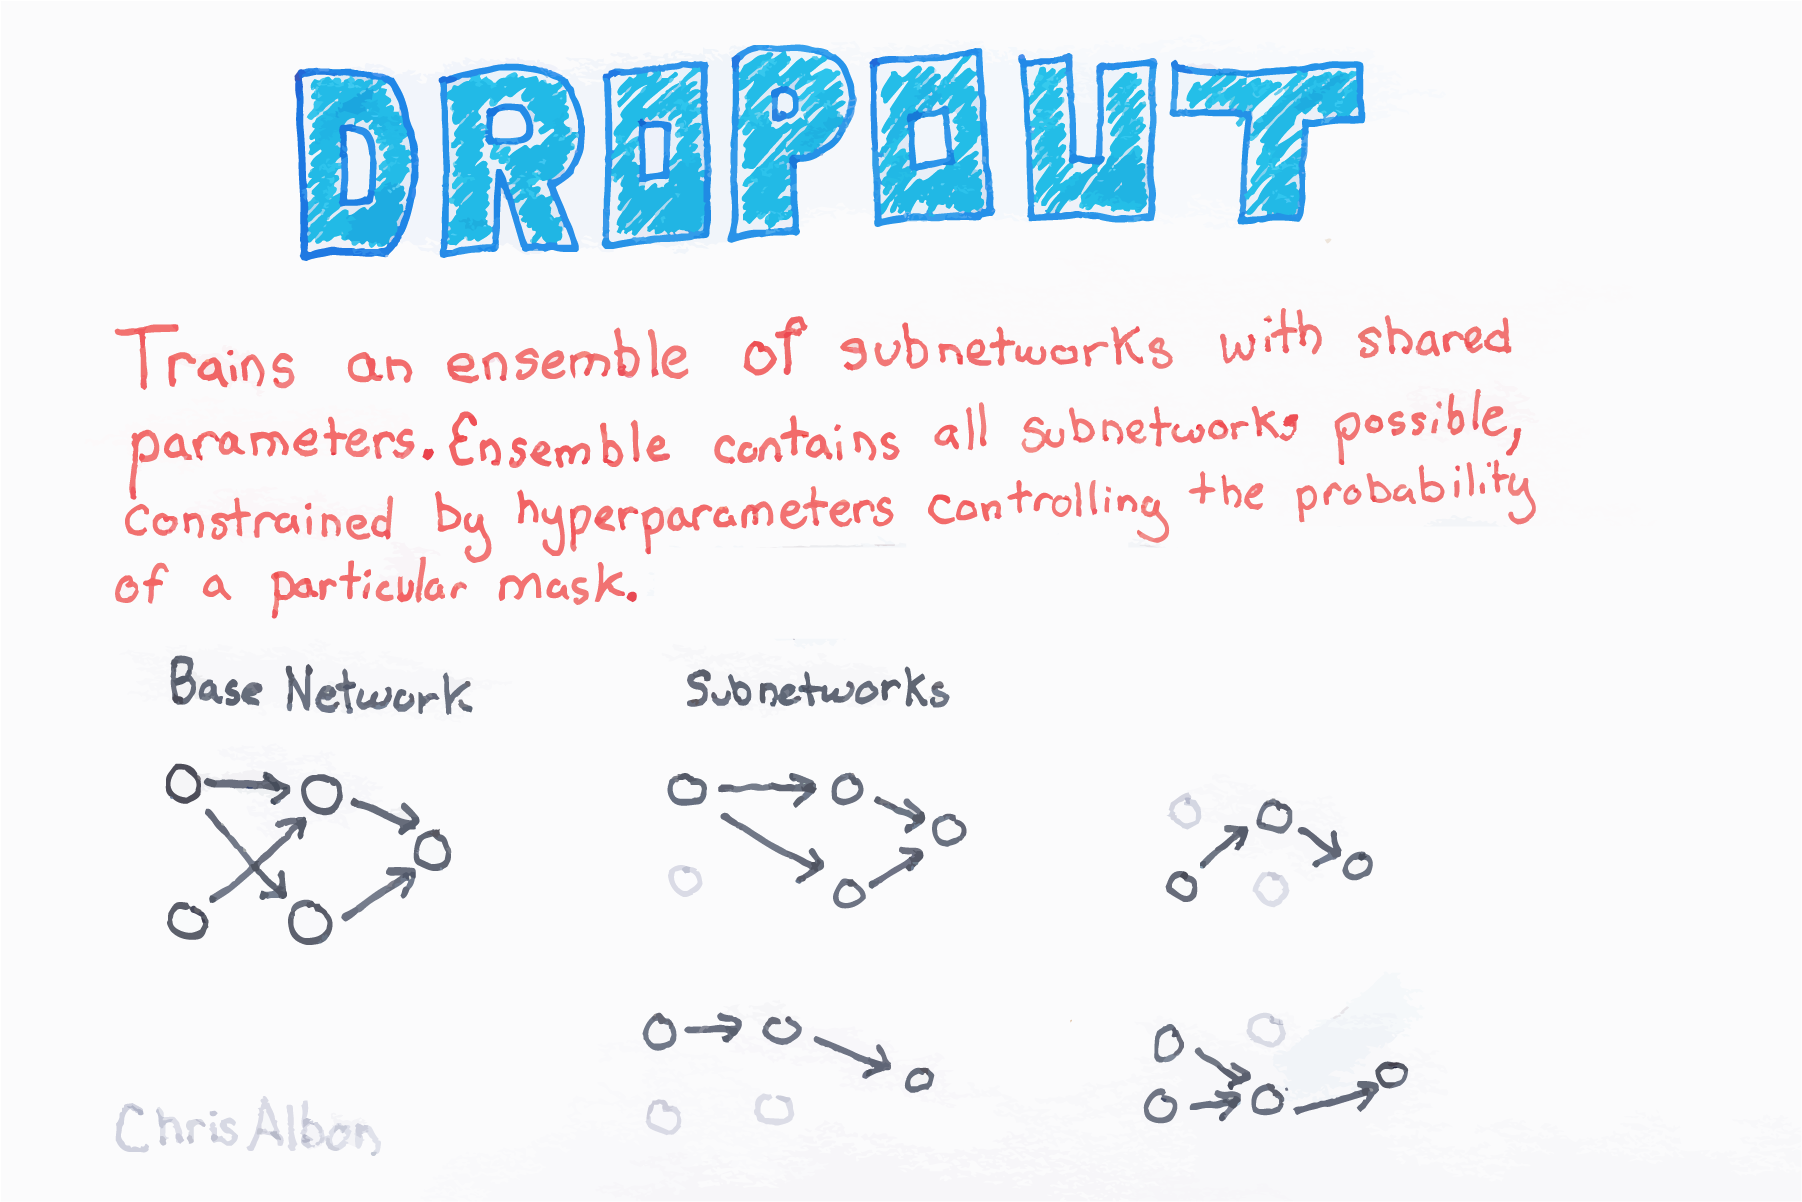

## Preliminaries

In [1]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Set random seed
np.random.seed(0)

Using TensorFlow backend.


## Load IMDB Movie Review Data

In [2]:
# Set the number of features we want
number_of_features = 1000

# Load data and target vector from movie review data
(train_data, train_target), (test_data, test_target) = imdb.load_data(num_words=number_of_features)

# Convert movie review data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
train_features = tokenizer.sequences_to_matrix(train_data, mode='binary')
test_features = tokenizer.sequences_to_matrix(test_data, mode='binary')

17465344/17464789 [==============================] - 3s 0us/step


## Construct Neural Network Architecture With Dropout Layer

In Keras, we can implement dropout by added Dropout layers into our network architecture. Each Dropout layer will drop a user-defined hyperparameter of units in the previous layer every batch. Remember in Keras the input layer is assumed to be the first layer and not added using the add. Therefore, if we want to add dropout to the input layer, the layer we add in our is a dropout layer. This layer contains both the proportion of the input layer’s units to drop 0.2 and input_shape defining the shape of the observation data. Next, after we add a dropout layer with 0.5 after each of the hidden layers.

In [3]:
# Start neural network
network = models.Sequential()

# Add a dropout layer for input layer
network.add(layers.Dropout(0.2, input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation='relu'))

# Add a dropout layer for previous hidden layer
network.add(layers.Dropout(0.5))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation='sigmoid'))

## Compile Neural Network

In [4]:
# Compile neural network
network.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

## Train Neural Network

In [5]:
# Train neural network
history = network.fit(train_features, # Features
                      train_target, # Target vector
                      epochs=3, # Number of epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(test_features, test_target)) # Data for evaluation